# Analysis of FreeSurfer data
The following notebook will analyze the metrics received from volume measurements in FreeSurfer.

### Imports

In [1]:
import pandas as pd
import numpy as np
import glob, sys, os, json, utils
import matplotlib.pyplot as plt

In [2]:
def plot_histogram(X, x_label, y_label, title, label):
    '''
    Plots histogram of a feature
    '''
    plt.hist(X, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

def get_data(csvFileName: str, ROI: []):
    '''
    The following function will sanitize data and build a numpy array with X ROI's volumes and y being the class [NC, PD]
    @csvFileName: input volumes csv
    @ROI: regions of interests desired
    '''
    df = pd.read_csv(csvFileName)
    df = utils.remove_unwanted_columns(df, ROI)
    df = utils.combine_left_right_vol(df)
        
    cols = list(df.columns.values)
    cols.pop(cols.index("subjectId"))
    df = df[["subjectId"]+cols]
    
    return df

In [3]:
ROI = [
      "subjectId", "stage",
      "Left-Putamen", "Right-Putamen", 
      "Right-Caudate", "Left-Caudate", 
      "Right-Thalamus-Proper", "Left-Thalamus-Proper", 
      "Left-Pallidum", "Right-Pallidum", 
      "Left-Cerebellum-White-Matter", "Right-Cerebellum-White-Matter", 
      "Left-Cerebellum-Cortex", "Right-Cerebellum-Cortex",
      "3rd-Ventricle", 
      "4th-Ventricle"
      "Pons",
      "SCP",
      "Midbrain"
]
df = get_data("../data/volumes.csv", ROI)

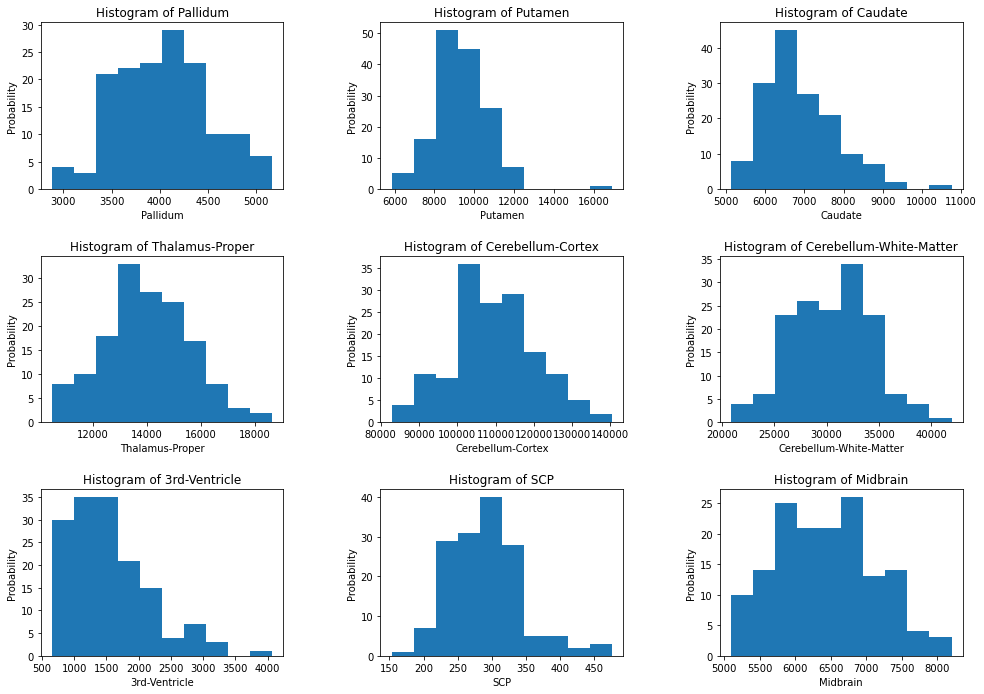

In [4]:
plt.figure(figsize=(16, 8)) 
index = 1
for column in df.columns[1:-1]:
    data = df[column].to_list()
    plt.subplot(3,3,index)
    plot_histogram(data, column, "Probability", f"Histogram of {column}", df.columns.to_list())
    index+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)